# TDA@HSE 2023

## Homework 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles

### Task 1 (14.02)

Consider the row and column Dowker complexes of a relation from seminar 1. Compute 0- and 1- Betti numbers of both complexes using the boundary matrix reduction algorithm from seminar 2. Conclude.

In [ ]:
# your code here

### Task 2 (1.03)

Consider the standard algorithm for computing persistent homology of a filtered simplicial complex $K$ from seminar 2. Given a boundary matrix of a filtration $\mathbf{B}$, the task is to obtain a reduced matrix $\mathbf{R}$. Out of reduced matrix one can obtain the persistent pairing $P$, i.e. the birth-death simplex pairs for each homological class given by the column-row indices of the non-zero columns of $\mathbf{B}$, and the persistent diagram $D$ given by the correspoding filtration function value for the pairing (seminar 3).

Consider the $2$-skeleton of the Vietoris-Rips filtration of a set $X \in \mathbb{R}^2$ sampled from a circle.

In [3]:
X, _ = make_circles(n_samples=(30, 0), noise=0.15, random_state=42)

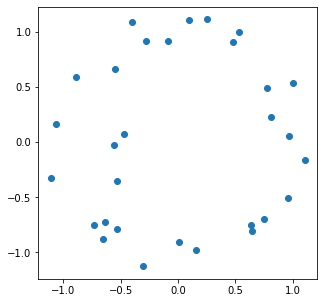

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1])
plt.show()

The $2$-skeleton of a filtered Vietoris-Rips complex have $X$ as the vertex set of cardinality $n$, with simplices up to dimension $2$, given by all possible $k$ out of $n$ combinations of vertices.

Simplices (thus columns of the boundary matrix $\mathbf{B}$) in the Vietoris-Rips filtration are ordered by the following rule:

- filtration function value, with $f(\sigma)=0$ for vertices, $f(\sigma)=d(x_i, x_j)$ for edges, and $f(\sigma) = \max_{(x_i, x_j) \in \sigma} d(x_i, x_j)$ for all other simplices,
- simplex dimension,
- lexicographic order given by any ordering of the vertices (the ordering is given by the order of rows in the matrix $\mathbf{X}$).

#### Task

Given a set of vertices $X$ compute the boundary matrix of its Vietoris-Rips filtration $\mathbf{B}$, the reduced matrix $\mathbf{R}$, persistent pairing $P_{VR}(X)$, persistent diagram $D_{VR}(X)$ and the representative cycles for each homological class of dimension $1$.

Plot the persistence diagram as a scatter plot or a barcode. Plot the representative cycles on the original plot of the set $X$.

Permute the rows of the matrix $\mathbf{X}$ to obtain new order on simplices given by the new order on vertices. Run the algorithm on the permutation $\pi(\mathbf{X})$. Plot the results, and conclude whether a persistent pairing, a persistent diagram, and representative cycles depend on the order on vertices.

In [ ]:
# your code here